In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

import sys
sys.path.append('./Classes')
from tohoku import makeTohokuKDEs, makeTohokuConditionalDistributions, plotConditionalDistribution, condDistFileName, readConditionalDistribution

In [29]:
#Set the bandwidth, transform type, and output folder
# transformType='none'
# bw_method=0.25
transformType='log'
bw_method=0.5

outFolder=transformType+"_bw"+str(bw_method)

# HEIGHT #

In [30]:
#Make height KDEs
heightKdes = makeTohokuKDEs(tohokuFile="../InputData/amplification_data.npy",
                            transformType=transformType,
                            bw_method=bw_method)

Wrote: log_bw0.5/kdes_height.png
Wrote: log_bw0.5/kdes_ht_zoom.png


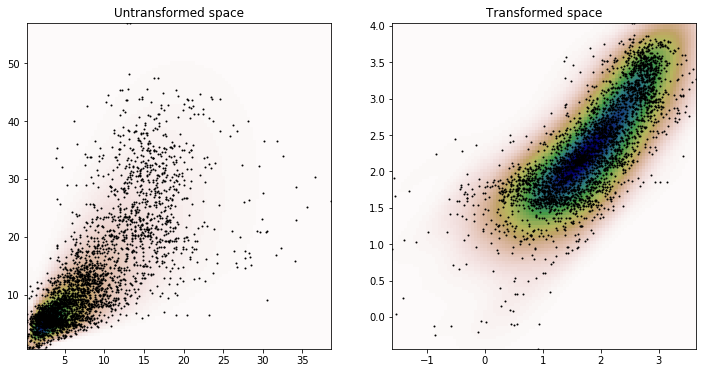

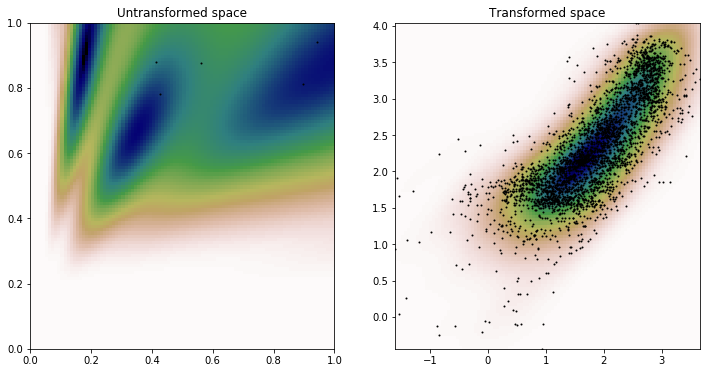

In [31]:
#Pick a KDE and plot it
kde=heightKdes[0]
#Plot the KDE
kde.plot(outputFile=outFolder+"/kdes_height.png")
#Focus near the origin
kde.plot(plotRange=[0, 1, 0, 1],outputFile=outFolder+"/kdes_ht_zoom.png")

In [5]:
#Compute the conditional distributions
prefix=outFolder+"/"+condDistFileName(prefix="",id=None)
cdList, onHtList, offHtList, kdeDistances = makeTohokuConditionalDistributions(heightKdes,filePrefix=prefix)

Computing conditional distribution for kernel 0
Saved: log_bw0.25/condDist_ht_0.npz


In [6]:
# #Compute the conditional distribution
# condDist, onShoreHeights, offShoreHeights = computeConditionalDistribution(kde)

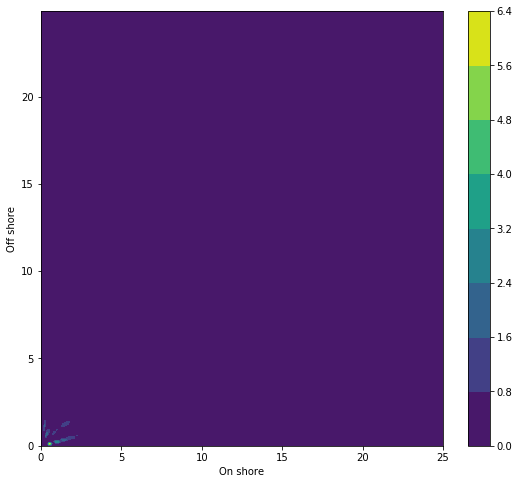

In [7]:
#Plot the conditional distributions
for i in range(len(cdList)):
    #plotConditionalDistribution(condDist, onShoreHeights, offShoreHeights, figsize=(9,8))
    plotConditionalDistribution(cdList[i], onHtList[i], offHtList[i], figsize=(9,8))

# INUNDATION #

In [8]:
# from tohoku import tohokuKDE

## GAUGE 2 ##

In [32]:
beta = 4.253277987952933  #Gauge 2
#beta = 1.1067189507222546 #Gauge 5
n    = 0.03

# tohokuFile="../InputData/amplification_data.npy"
# amplification_data = np.load(tohokuFile)
# onHeights = amplification_data[:, 0]
# offHeights = amplification_data[:, 1]
# # inundations = heightToInundation(onHeights, gauge)
# inundations = np.power(np.maximum(onHeights,0),4/3) * 0.06 * np.cos(np.pi*beta/180.0) / (n**2)

# kde = tohokuKDE(inundations, offHeights, transformType=transformType, bw_method=bw_method)
inundationKdes = makeTohokuKDEs(tohokuFile="../InputData/amplification_data.npy",
                            beta=beta,
                            n=n,
                            transformType=transformType,
                            bw_method=bw_method)

Wrote: log_bw0.5/kdes_inun_b4.253_n0.030_0.png
Wrote: log_bw0.5/kdes_inun_b4.253_n0.030_0_zoom.png


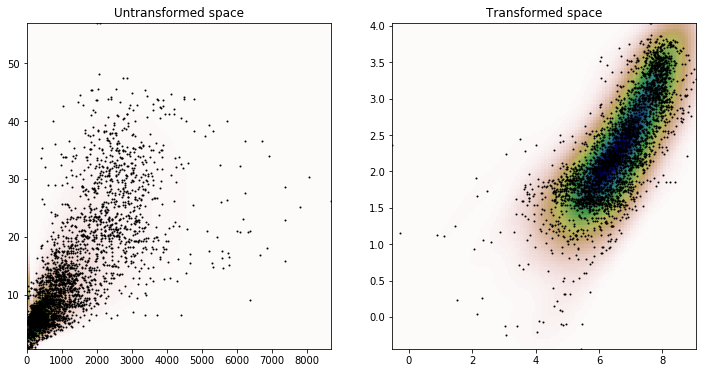

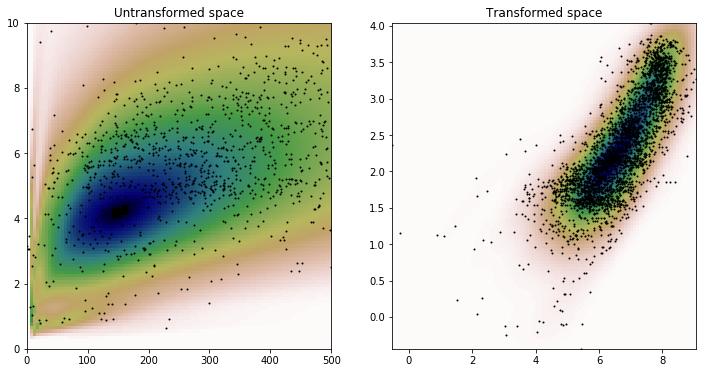

In [33]:
kde=inundationKdes[0]
prefix=outFolder+"/kdes_inun_b{:4.3f}_n{:4.3f}_".format(beta,n)
#Plot the KDE
kde.plot(outputFile=prefix+"0.png")
#Focus near the origin
kde.plot(plotRange=[0, 500, 0, 10],outputFile=prefix+"0_zoom.png")

In [11]:
#Compute the conditional distributions
prefix=outFolder+"/"+condDistFileName(prefix="",id=None,beta=beta,n=n)
# cdList, inunList, offHtList, kdeDistances = makeTohokuConditionalDistributions(inundationKdes,
#                                                                                filePrefix="condDist_b{:4.3f}_n{:4.3f}_".format(beta,n),
#                                                                                nOn=5000)
cdList, inunList, offHtList, kdeDistances = makeTohokuConditionalDistributions(inundationKdes,
                                                                               filePrefix=prefix,
                                                                               nOn=5000)

Computing conditional distribution for kernel 0
Saved: log_bw0.25/condDist_inun_b4.253_n0.030_0.npz


Wrote: log_bw0.25/condDist_inun_b4.253_n0.030_0.png


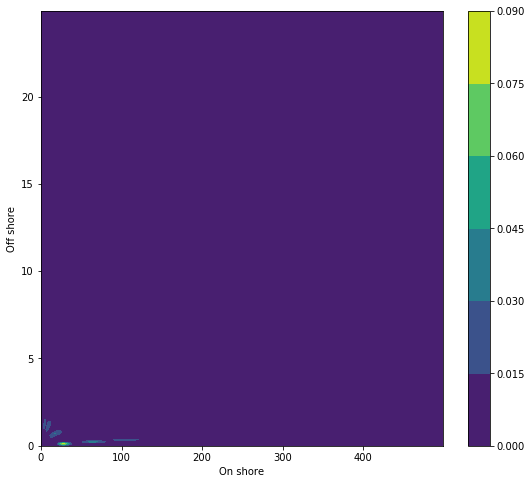

In [12]:
# def plotConditionalDistribution(condDist,x,y,xmax=25.,ymax=25.,**kwargs):
#     condDist = condDist[y <= ymax, :]
#     condDist = condDist[:, x <= xmax]
#     x = x[x <= xmax]
#     y = y[y <= ymax]

#     fig, ax = plt.subplots(**kwargs)

#     X,Y = np.meshgrid(x,y)
#     plt.contourf(X, Y, condDist)

#     plt.xlabel('On shore')
#     plt.ylabel('Off shore')
#     #plt.xlim(0.,xmax)
#     #plt.ylim(0.,ymax)
#     #plt.gca().set_aspect("equal")
#     plt.colorbar()
#from tohoku import plotConditionalDistribution

#Plot the conditional distributions
for i in range(len(cdList)):
    #plotConditionalDistribution(condDist, onShoreHeights, offShoreHeights, figsize=(9,8))
    plotConditionalDistribution(cdList[i], inunList[i], offHtList[i], xmax=500, figsize=(9,8), outputFile=prefix+str(i)+".png")

## Gauge 5 ##

In [34]:
beta = 1.1067189507222546 #Gauge 5
n    = 0.03

inundationKdes = makeTohokuKDEs(tohokuFile="../InputData/amplification_data.npy",
                            beta=beta,
                            n=n,
                            transformType=transformType,
                            bw_method=bw_method)

Wrote: log_bw0.5/kdes_inun_b1.107_n0.030_0.png
Wrote: log_bw0.5/kdes_inun_b1.107_n0.030_0_zoom.png


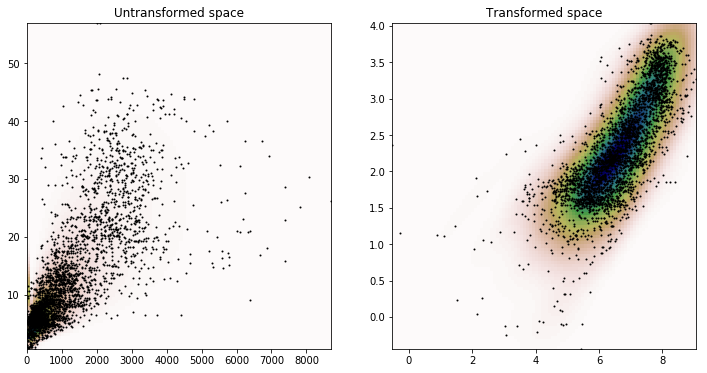

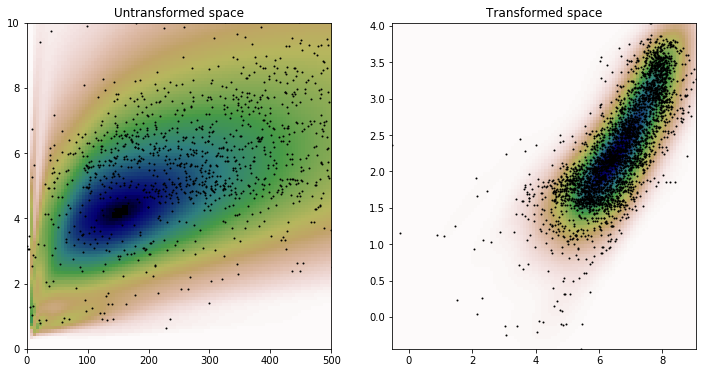

In [35]:
kde=inundationKdes[0]
prefix=outFolder+"/kdes_inun_b{:4.3f}_n{:4.3f}_".format(beta,n)
#Plot the KDE
kde.plot(outputFile=prefix+"0.png")
#Focus near the origin
kde.plot(plotRange=[0, 500, 0, 10],outputFile=prefix+"0_zoom.png")

In [15]:
#Compute the conditional distributions
prefix=outFolder+"/"+condDistFileName(prefix="",id=None,beta=beta,n=n)
cdList, inunList, offHtList, kdeDistances = makeTohokuConditionalDistributions(inundationKdes,
                                                                               filePrefix=prefix,
                                                                               nOn=5000)

Computing conditional distribution for kernel 0
Saved: log_bw0.25/condDist_inun_b1.107_n0.030_0.npz


Wrote: log_bw0.25/condDist_inun_b1.107_n0.030_0.png


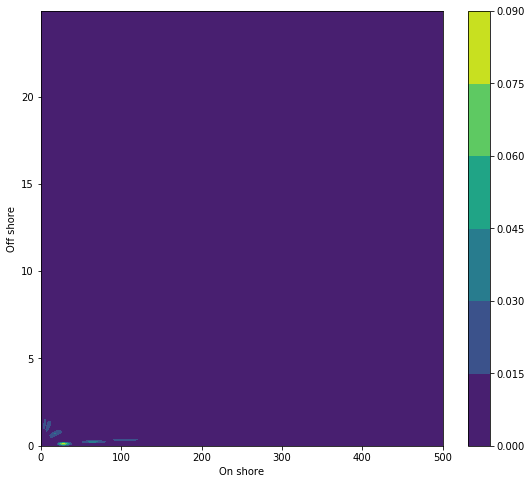

In [16]:
#from tohoku import plotConditionalDistribution

#Plot the conditional distributions
for i in range(len(cdList)):
    #plotConditionalDistribution(condDist, onShoreHeights, offShoreHeights, figsize=(9,8))
    plotConditionalDistribution(cdList[i], inunList[i], offHtList[i], xmax=500, figsize=(9,8),outputFile=prefix+str(i)+".png")

In [17]:
# from tohoku import readConditionalDistribution
# cdFile="condDist_inun_5.npz"
# condDist, inundations, offShoreHeights, distance, bw_method, transformType = readConditionalDistribution(cdFile)
# plotConditionalDistribution(condDist, inundations, offShoreHeights, figsize=(9,8))

# TEST ABSTRACTKDE #

In [18]:
#Make dataset
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('./Classes')
dataset = 25*np.random.random(100)
#plt.hist(dataset)
#print(dataset.T)

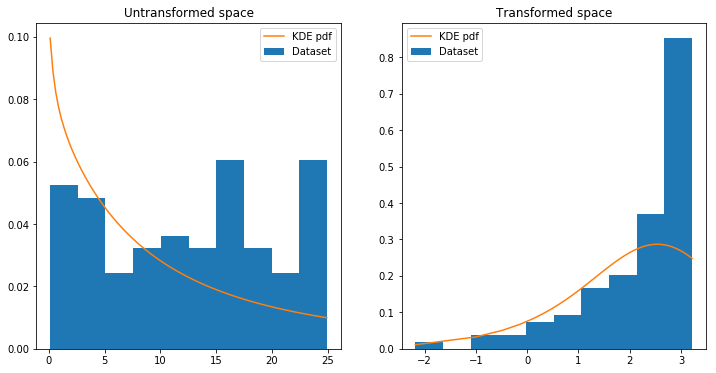

In [19]:
#Make an AbstractKDE and plot it
#from AbstractKDE import AbstractKDE
import AbstractKDE
import importlib
importlib.reload(AbstractKDE)
kernel = AbstractKDE.AbstractKDE(dataset,bw_method=1,transformType='log')
kernel.plot()

# TEST #

In [20]:
# #Print slices of KDEs so we can observe how they're computed and compare with gauge PDFs

# #inundation distribution from Gauge 2
# inundation_skew_param = 3
# inundation_mean = 231  # in meters
# inundation_std = 85
# gaugeDist = stats.skewnorm(inundation_skew_param,inundation_mean,inundation_std)

# for offHeight in np.arange(0.0,20.0,2.0):
#     #print("starting offHeight =",offHeight);
#     #offHeight = 5.0; 
#     offDel = 0.25; offMin = offHeight - offDel; offMax = offHeight + offDel;

#     onShoreHeights = np.linspace(0.0,5000.0,num=5000);

#     #filter dataset so that offshore height is in (offMin,offMax)
#     tohokuVals = kde.dataset.T;

#     tohokuVals = tohokuVals[(tohokuVals[:,1] >= offMin) & (tohokuVals[:,1] <= offMax),:];

#     #compute KDE PDF
#     xy = np.zeros((2, len(onShoreHeights)));
#     xy[0, :] = onShoreHeights;
#     xy[1, :] = offHeight;
#     kdePdf = kde.pdf(xy);

#     #normalize
#     from buildGaugeLikelihoods import trapRuleWeights
#     wt = trapRuleWeights(onShoreHeights);
#     kdePdf /= sum(wt * kdePdf);

#     #plot data histogram vs. KDE pdf
#     plt.figure()
#     plt.hist(tohokuVals[:,0],20,density=True,histtype='bar',label="Tohoku data");
# #    plt.plot(onShoreHeights,kdePdf,label="KDE pdf");
#     plt.ylim(0,2) #make height consistent to make differences more clear 
# #    plt.xlabel("Onshore wave height (run up)");
# #   plt.legend();
# #    plt.title("Tohoku histogram vs. KDE pdf for Off-shore height="+str(offHeight));
#     pltNm="plots/all/kde_hist_off{:03.2f}.png".format(offHeight)
#     plt.savefig(pltNm);
#     print("wrote:",pltNm);
# 
# #    #zoom in on x=(0,5) and add Ambon height pdf so we can see what's happening for that observation
# #    plt.plot(onShoreHeights,gaugeDist.pdf(onShoreHeights),label="Ambon (Wichmann)");
# #    plt.legend();
# #    plt.xlim(0,1000)
#    
# #    print("integral of gauge pdf against kde pdf for offHeight=",offHeight,"is:",sum(gaugeDist.pdf(onShoreHeights)*kdePdf))
#     pltNm="plots/narrow/kde_hist_off{:03.2f}.png".format(offHeight)
#     plt.savefig(pltNm);
#     print("wrote:",pltNm);    
#     plt.close();
#    
#     ## now renormalize the kde pdf so that we're only looking at heights > 0
#     onShoreHeightsNZ = np.linspace(0.0,5.0,num=500);
#     #build table of on/off shore values
#     xy = np.zeros((2, len(onShoreHeightsNZ)));
#     xy[0, :] = onShoreHeightsNZ;
#     xy[1, :] = offHeight;
#     #compute kde
#     kdePdf = kde.pdf(xy);
#     #normalize
#     from buildGaugeLikelihoods import trapRuleWeights
#     wt = trapRuleWeights(onShoreHeightsNZ);
#     kdePdf /= sum(wt * kdePdf); #normalize
#     #plot data histogram vs. KDE pdf
#     plt.hist(tohokuVals[:,0],20,density=True,histtype='bar',label="Tohoku data");
#     plt.plot(onShoreHeightsNZ,kdePdf,label="KDE pdf");
#     plt.plot(onShoreHeightsNZ,gaugeDist.pdf(onShoreHeightsNZ),label="Gauge 2");
#     plt.xlim(0,5)
#     plt.ylim(0,2) #make height consistent to make differences more clear
#     plt.xlabel("Onshore wave height (run up)");
#     plt.legend();
#     plt.title("Tohoku histogram vs. KDE pdf for Off-shore height="+str(offHeight));
#     pltNm="plots/nonzero/kde_hist_off{:03.2f}.png".format(offHeight)
#     plt.savefig(pltNm);
#     print("wrote:",pltNm);
#
#     plt.close();